<a href="https://colab.research.google.com/github/SteveOat/Hit-Song/blob/main/%E0%B9%80%E0%B8%9A%E0%B8%99%E0%B8%8B%E0%B9%8C%E0%B9%81%E0%B8%81%E0%B9%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Introducing Dataset

sldfjlskdajfklasjfkldjalfdsjfklasdfl lorem ypsum salfjkdslajflasdfjklsdfjakldsfklsjd

The dataset offers a detailed overview of contemporary music, featuring 620 tracks from 87 chart-topping artists between 2000 and 2023. It highlights the diversity of modern pop and R&B, capturing the evolution of Hot 100 hits over two decades. Each track is annotated with Spotify's audio features, providing insights into characteristics like tempo, energy, danceability, and valence, making it a valuable resource for exploring trends in popular music.

<h1>Key finding

Working on Spotify's api data
1. Visualize characteristics of hit songs on Billboard charts.
2. Find the most streamed genre on platform.
3. Does the artist's fame affect whether a song makes it onto the Billboard charts?

<h1>What is "Billboard" and Why "Spotify"

Songs make it to the **Billboard** charts (Top Hot 100) based on three key factors:

1. *Streaming* : Plays on platforms like ***Spotify***, Apple Music, YouTube, etc.
2. *Sales* : Digital and physical sales (e.g., iTunes, vinyl).
3. *Radio Airplay* : Number of times the song is played on radio stations.

Billboard compiles this data weekly from sources like Nielsen SoundScan and MRC Data to rank songs.<br>The combination of these factors determines a song's position on the charts.

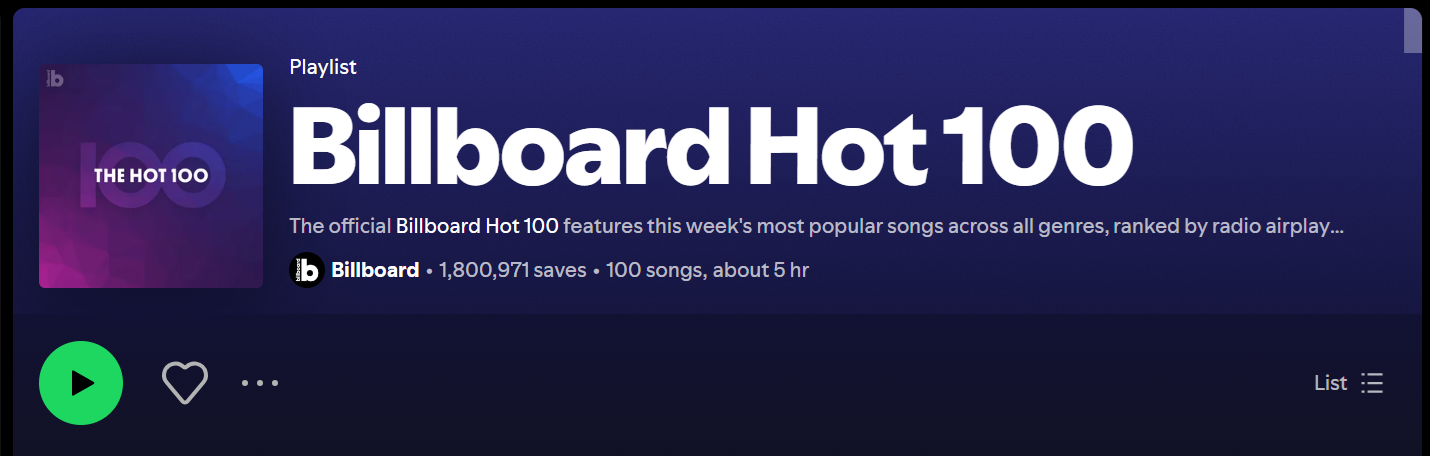

<hr>

<h1>Import Libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display_html

!pip install plotly==5.15.0
import plotly.express as px
import plotly.graph_objects as go

df_1 = pd.read_csv('Hot100.csv')
df_2 = pd.read_csv('spotify_full_list_20102023.csv')

<h1>Preparing Data

>Remove **Bracket "()"**  from "Track" column to match the text format of song's name.

In [2]:
df_1['Track'] = df_1['Track'].str.replace(r'\(.*\)', '', regex=True)
df_2['Artist and Title'] = df_2['Artist and Title'].str.replace(r'\(.*\)', '', regex=True)


>Remove **Space " "** and transform every text to lowercase

>Splits **"Artist and Title"** into **"Artist"** , **"Track"**  


In [3]:
df_1['Track'] = df_1['Track'].str.replace(' ','').str.lower()
df_1['Artist_No_Space'] = df_1['Artist'].str.replace(' ','').str.lower()

df_2[['Artist', 'Track']] = df_2['Artist and Title'].str.split('-', n=1, expand=True)

df_2['Artist'] = df_2['Artist'].str.replace(' ','').str.lower()
df_2['Track'] = df_2['Track'].str.replace(' ','').str.lower()

df_2.columns

Index(['Unnamed: 0', 'Artist and Title', 'Artist', 'Streams', 'Daily', 'year',
       'main_genre', 'genres', 'first_genre', 'second_genre', 'third_genre',
       'Track'],
      dtype='object')

>Merge the tables and filled *NaN* value in **"main_genre"** with *Unknown*

>Remove duplicate **"Artist"** column

In [4]:
df_column = df_2[['Track', 'Artist', 'main_genre','Streams']]

df_pre_final = pd.merge( df_1, df_column, left_on=['Track','Artist_No_Space'], right_on=['Track','Artist'], how='left' )
df_pre_final['main_genre'] = df_pre_final['main_genre'].fillna('Unknown')
df_pre_final = df_pre_final.drop(columns=['Artist_y'])

df_final = df_pre_final.rename(columns={'Artist_x': 'Artist'})

>Create new column by combining rows that have the same song name but are sung by different artists to differentiate them.

In [5]:
df_final['Track_n_artist'] = df_final['Track'] + '_' + df_final['Artist_No_Space']

df_final

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Artist_No_Space,main_genre,Streams,Track_n_artist
0,7rings,Ariana Grande,"thank u, next",2019,178626,4,0.780,0.321,1,-10.747,...,0.56200,0.000000,0.0881,0.315,139.961,50,arianagrande,Pop,2.307550e+09,7rings_arianagrande
1,breakfree,Ariana Grande,My Everything - Deluxe,2014,214840,4,0.686,0.702,7,-5.325,...,0.00637,0.000045,0.2040,0.290,129.948,76,arianagrande,Pop,9.188317e+08,breakfree_arianagrande
2,dangerouswoman,Ariana Grande,Dangerous Woman,2016,235946,3,0.664,0.602,4,-5.369,...,0.05290,0.000000,0.3560,0.289,134.049,70,arianagrande,Pop,1.161277e+09,dangerouswoman_arianagrande
3,godisawoman,Ariana Grande,Sweetener,2018,197546,4,0.602,0.658,1,-5.934,...,0.02330,0.000060,0.2370,0.268,145.031,75,arianagrande,Pop,1.079614e+09,godisawoman_arianagrande
4,intoyou,Ariana Grande,Dangerous Woman,2016,244453,4,0.623,0.734,9,-5.948,...,0.01620,0.000002,0.1450,0.370,107.853,71,arianagrande,Pop,1.405367e+09,intoyou_arianagrande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,iremembereverything,Zach Bryan,Zach Bryan,2022,227195,4,0.429,0.453,0,-7.746,...,0.55400,0.000002,0.1020,0.155,77.639,89,zachbryan,World/Traditional,7.328718e+08,iremembereverything_zachbryan
640,ifshewantsacowboy,Zach Bryan,American Heartbreak,2023,192293,4,0.553,0.823,7,-3.194,...,0.02010,0.000000,0.1110,0.552,133.781,63,zachbryan,Unknown,NaN,ifshewantsacowboy_zachbryan
641,lettingsomeonego,Zach Bryan,DeAnn,2022,239761,4,0.543,0.117,0,-15.153,...,0.81100,0.000000,0.1470,0.395,83.607,65,zachbryan,Unknown,NaN,lettingsomeonego_zachbryan
642,somethingintheorange,Zach Bryan,Something in the Orange,2022,228013,3,0.369,0.192,4,-12.151,...,0.55500,0.000008,0.0954,0.148,175.212,87,zachbryan,World/Traditional,9.745785e+08,somethingintheorange_zachbryan


<hr>

<h1>Clustering Data

**1. Key**
*   Musical key of the track, represented by integers (0 = C, 1 = C#/Db, etc.).



In [6]:
df_final['Cluster_Key'] = np.where(df_final['Key'] == 0, 'C',
                                         np.where(df_final['Key'] == 1, 'C#/Db',
                                        np.where(df_final['Key'] == 2, 'D',
                                        np.where(df_final['Key'] == 3, 'Eb',
                                        np.where(df_final['Key'] == 4, 'E',
                                        np.where(df_final['Key'] == 5, 'F',
                                        np.where(df_final['Key'] == 6, 'F#/Gb',
                                        np.where(df_final['Key'] == 7, 'G',
                                        np.where(df_final['Key'] == 8, 'G#/Ab',
                                        np.where(df_final['Key'] == 9, 'A',
                                        np.where(df_final['Key'] ==  10, 'A#/Bb',
                                        np.where(df_final['Key'] ==  11, 'B',''))))))))))))

**2. Mode**
* Indicates whether the track is in a major (1) or minor (0) key.

In [7]:
df_final['Cluster_Mode'] = np.where(df_final['Mode'] == 0, 'Minor',
                                      np.where(df_final['Mode'] == 1, 'Major',''))

**3. Duration**
- Length of the track, usually in milliseconds.
 - Short: 0 - 180,000 ms (0 - 3 minutes)
 - Medium: 180,001 - 300,000 ms (3 - 5 minutes)
 - Long: 300,001 ms and above (5+ minutes)

In [8]:
df_final['Cluster_Duration(Min)'] = np.where(df_final['Duration'] < 180000, '0-3mins',
                                                  np.where(df_final['Duration'] < 300000, '3-5mins', '5+mins'))

**4. Danceability**
- How suitable a track is for dancing, from 0.0 to 1.0.
 - Low: 0.0 - 0.4 (e.g., classical, ambient)
 - Medium: 0.4 - 0.7 (e.g., soft rock, indie)
 - High: 0.7 - 1.0 (e.g., pop, dance, hip-hop)

In [9]:
df_final['Cluster_Danceability'] = np.where(df_final['Danceability'] <= 0.4, 'Low_Dance',
                                               np.where(df_final['Danceability'] <= 0.7, 'Mid_Dance',
                                               np.where(df_final['Danceability'] <=  1,'High_Dance','')))

**5. Energy**
- Measure of intensity and activity in the track, from 0.0 to 1.0.
 - Low Energy: 0.0 - 0.4 (e.g., acoustic, ambient, soft ballads)
 - Medium Energy: 0.4 - 0.7 (e.g., indie rock, chill electronic)
 - High Energy: 0.7 - 1.0 (e.g., EDM, rock, fast-paced pop)

In [10]:
df_final['Cluster_Energy'] = np.where(df_final['Energy'] <= 0.4, 'Low_Energy',
                                        np.where(df_final['Energy'] <= 0.7, 'Mid_Energy',
                                        np.where(df_final['Energy'] <=  1, 'High_Energy','')))

**6.Loudness**
- Spotify offers three loudness settings to control how normalization is applied:

 - Loud : This applies a normalization level of around -11 dB LUFS, suitable for noisier environments where higher volume is needed.
 - Normal (default) : This is the standard setting at -14 dB LUFS, aiming for balanced playback across all tracks.
 - Quiet : This setting lowers the loudness normalization target to -23 dB LUFS, ideal for quiet environments or more dynamic listening experiences.

In [11]:
df_final['Cluster_Loudness'] = np.where(df_final['Loudness'] >= -11, 'High_Loud',
                                            np.where(df_final['Loudness'] >= -14, 'Mid_Loud', 'Low_Loud'))

**7. Speechiness**
-  Detects the presence of spoken words in a track, from 0.0 to 1.0.
 - Low Speechiness: 0.0 - 0.33 (e.g., music without much spoken word)
 - Medium Speechiness: 0.33 - 0.66 (e.g., tracks with both music and speech, like rap)
 - High Speechiness: 0.66 - 1.0 (e.g., podcasts, spoken word tracks)

In [12]:
df_final['Cluster_Speechiness'] = np.where(df_final['Speechiness'] <= 0.333, 'Low_Speech',
                                               np.where(df_final['Speechiness'] <= 0.666, 'Mid_Speech',
                                               np.where(df_final['Speechiness'] <=  1, 'High_Speech','')))

**8. Acousticness**
- Confidence level that the track is acoustic, from 0.0 to 1.0.
 - Low Acousticness: 0.0 - 0.3 (e.g., electronic, heavily produced)
 - Medium Acousticness: 0.3 - 0.7 (e.g., some balance between acoustic and electronic elements)
 - High Acousticness: 0.7 - 1.0 (e.g., acoustic tracks, singer-songwriter)

In [13]:
df_final['Cluster_Acousticness'] = np.where(df_final['Acousticness'] <= 0.3, 'Low_Acoustic',
                                                np.where(df_final['Acousticness'] <= 0.7, 'Mid_Acoustic',
                                                np.where(df_final['Acousticness'] <=  1, 'High_Acoustic','')))

**9. Instrumentalness**
- Probability that the track contains no vocals, from 0.0 to 1.0.
 - Vocal-heavy: 0.0 - 0.1 (most mainstream music)
 - Medium Instrumentalness: 0.1 - 0.5 (vocals present but not dominant)
 - Instrumental: 0.5 - 1.0 (mostly instrumental, no vocals)

In [14]:
df_final['Cluster_Instrumentalness'] = np.where(df_final['Instrumentalness'] <= 0.1, 'Low_Instru',
                                                      np.where(df_final['Instrumentalness'] <= 0.5, 'Mid_Instru',
                                                      np.where(df_final['Instrumentalness'] <=  1, 'High_Instru','')))

**10. Liveness**
- Detects the presence of a live audience in the recording, from 0.0 to 1.0.
 - Studio-like: 0.0 - 0.3 (recorded in a studio without live ambiance)
 - Medium Liveness: 0.3 - 0.6 (some audience noise or live characteristics)
 - Live Recording: 0.6 - 1.0 (recorded live in concert with audience presence)

In [15]:
df_final['Cluster_Liveness'] = np.where(df_final['Liveness'] <= 0.3, 'Studio_Liveness','Outdoor_Liveness')

**11. Valence**
- Describes the musical positiveness conveyed by a track, from 0.0 to 1.0.
 - Low Valence: 0.0 - 0.3 (e.g., sad, melancholic tracks)
 - Medium Valence: 0.3 - 0.6 (e.g., neutral or emotionally mixed tracks)
 - High Valence: 0.6 - 1.0 (e.g., happy, cheerful, upbeat tracks)

In [16]:
df_final['Cluster_Valence'] = np.where(df_final['Valence'] <= 0.3, 'Low_Valence',
                                         np.where(df_final['Valence'] <= 0.6, 'Mid_Valence',
                                         np.where(df_final['Valence'] <=  1, 'High_Valence','')))

**12. Tempo**
- Speed of the track in beats per minute (BPM).
 - Slow: 0 - 60 BPM (e.g., ballads, ambient music)
 - Medium: 60 - 120 BPM (e.g., pop, mid-tempo rock)
 - Fast: 120 - 180+ BPM (e.g., dance, EDM, upbeat tracks)

In [17]:
df_final['Cluster_Tempo'] = np.where(df_final['Tempo'] <= 60 , 'Low_Tempo',
                                       np.where(df_final['Tempo'] <= 120 , 'Mid_Tempo', 'High_Tempo'))

<hr>

<h2>1. Visualize characteristics of hit songs on Billboard charts.

> Key Signature

In [18]:
# Assuming 'df_final' is your DataFrame
# Group by 'Cluster_Key' and count 'Track'
cluster_key_count = df_final.groupby('Cluster_Key')['Track'].count().reset_index()

# Define the order for the x-axis
sort_key = ['C', 'C#/Db', 'D', 'Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']

# Create a Plotly bar plot
fig = px.bar(cluster_key_count, x='Cluster_Key', y='Track',
             category_orders={'Cluster_Key': sort_key},  # Sort the x-axis by 'sort_key'
             labels={'Track': 'Count of Track', 'Cluster_Key': 'Cluster Key'},  # Labels for axes
             title='Track Count by Cluster Key',
             text='Track')  # Display counts on top of bars

# Customize the plot
fig.update_traces(marker_color='skyblue', textposition='outside')

# Adjust layout for better appearance
fig.update_layout(xaxis_title='Cluster Key',
                  yaxis_title='Count of Track',
                  xaxis_tickangle=-45,  # Rotate x-axis labels
                  uniformtext_minsize=8, uniformtext_mode='hide')

# Show the figure
fig.show()


<hr>

> Major or Minor

In [19]:
# Assuming 'df_final' is your DataFrame
# Group by 'Cluster_Mode' and count 'Track'
cluster_mode_count = df_final.groupby('Cluster_Mode')['Track'].count().reset_index()

# Create the pie chart using Plotly
fig = px.pie(cluster_mode_count, values='Track', names='Cluster_Mode',
             title='Track Count by Cluster Mode',
             color_discrete_sequence=['#FFCCCB', '#98FB98', '#ADD8E6'],  # Custom colors
             hole=0.3)  # Optional: Add a hole in the center for a donut chart

# Customize the chart layout
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

Tempo VS Track

In [20]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace with your actual DataFrame)
# df_final = pd.read_csv('your_data.csv')  # Load your actual data

# Group by 'Cluster_Tempo' and count 'Track'
cluster_tempo_count = df_final.groupby('Cluster_Tempo')['Track'].count().reset_index()

# Define the desired order of tempo clusters
sort_tempo = ['Low_Tempo', 'Mid_Tempo', 'High_Tempo']

# Create a DataFrame to ensure all clusters are represented, including those with zero counts
tempo_counts = {tempo: 0 for tempo in sort_tempo}  # Initialize counts to zero
for _, row in cluster_tempo_count.iterrows():
    tempo_counts[row['Cluster_Tempo']] = row['Track']  # Fill in actual counts

# Convert back to DataFrame
cluster_tempo_count = pd.DataFrame(list(tempo_counts.items()), columns=['Cluster_Tempo', 'Track'])

# Create the bar plot using Plotly Express
fig = px.bar(
    cluster_tempo_count,
    x='Cluster_Tempo',
    y='Track',
    title='Track Count by Cluster Tempo',
    labels={'Cluster_Tempo': 'Cluster Tempo', 'Track': 'Count of Track'},
    color_discrete_sequence=['#FFB6C1'],  # Use a single color (e.g., light pink)
    category_orders={'Cluster_Tempo': sort_tempo}  # Ensure correct order
)

# Add the counts on top of the bars for the plot
for i, row in cluster_tempo_count.iterrows():
    fig.add_annotation(
        x=row['Cluster_Tempo'],
        y=row['Track'],
        text=f"{int(row['Track']):,}",  # Format count without decimal
        showarrow=False,
        yshift=10  # Adjust position of the label
    )

# Update the layout to set y-axis limit
fig.update_yaxes(range=[0, 380])

# Show the plot
fig.show()


Duration VS Track

In [21]:
# Assuming 'df_final' is your DataFrame
# Group by 'Cluster_Duration(Min)' and count 'Track'
cluster_duration_count = df_final.groupby('Cluster_Duration(Min)')['Track'].count().reset_index()

# Create a bar plot using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=cluster_duration_count['Cluster_Duration(Min)'],
        y=cluster_duration_count['Track'],
        text=cluster_duration_count['Track'],
        textposition='auto',
        marker_color='#CBC3E3',  # Set the bar color
    )
])

# Update layout for the figure
fig.update_layout(
    title='Track Count by Cluster Duration',
    xaxis_title='Cluster Duration (Min)',
    yaxis_title='Count of Track',
    yaxis=dict(range=[0, 500]),  # Set y-axis limit to match original
    xaxis_tickangle=0,  # Optional: no rotation of x-axis labels
    plot_bgcolor='white',
)

# Show the plot
fig.show()


Loudness VS Track

In [22]:
# Group by 'Cluster_Loudness' and count 'Track'
cluster_loud_count = df_final.groupby('Cluster_Loudness')['Track'].count().reset_index()

# Define the desired order for the x-axis
sort_loud = ['Low_Loud', 'Mid_Loud', 'High_Loud']

# Reorder the DataFrame based on the desired order
cluster_loud_count['Cluster_Loudness'] = pd.Categorical(cluster_loud_count['Cluster_Loudness'], categories=sort_loud, ordered=True)
cluster_loud_count = cluster_loud_count.sort_values('Cluster_Loudness')

# Create the bar plot using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=cluster_loud_count['Cluster_Loudness'],
        y=cluster_loud_count['Track'],
        text=cluster_loud_count['Track'],
        textposition='auto',  # Display counts on top of bars
        marker_color='#FFB6C1'  # Set the bar color
    )
])

# Update layout for the figure
fig.update_layout(
    title='Track Count by Cluster Loudness',
    xaxis_title='Cluster Loudness',
    yaxis_title='Count of Track',
    yaxis=dict(range=[0, 680]),  # Set y-axis limit to match original
    plot_bgcolor='white'
)

# Show the plot
fig.show()

Danceability VS Popularity VS Cluster

In [23]:
# Define custom color mapping
color_map = {'Low_Dance': 'blue', 'Mid_Dance': 'green', 'High_Dance': 'red'}

# Count the number of tracks in each danceability cluster
counts = df_final['Cluster_Danceability'].value_counts()

# Define the desired order of danceability clusters
sort_dance = ['Low_Dance', 'Mid_Dance', 'High_Dance']

# Create labels with counts
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_final,
    x='Danceability',
    y='Popularity',
    color='Cluster_Danceability',
    color_discrete_map=color_map,
    category_orders={'Cluster_Danceability': sort_dance},  # Ensure correct order
    labels={'Cluster_Danceability': 'Cluster Danceability'},
    title='Danceability vs Popularity by Cluster'
)

# Customize the legend title and update the legend labels
fig.for_each_trace(lambda t: t.update(name=sorted_labels[sort_dance.index(t.name)]))

# Show the plot
fig.show()


Energy VS Popularity VS Cluster

In [24]:
# Define custom color mapping
color_map = {'Low_Energy': 'blue', 'Mid_Energy': 'green', 'High_Energy': 'red'}

# Count the number of tracks in each energy cluster
counts = df_final['Cluster_Energy'].value_counts()

# Define the desired order of energy clusters
sort_energy = ['Low_Energy', 'Mid_Energy', 'High_Energy']

# Create labels with counts
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_energy]

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_final,
    x='Energy',
    y='Popularity',
    color='Cluster_Energy',
    color_discrete_map=color_map,
    category_orders={'Cluster_Energy': sort_energy},  # Ensure correct order
    labels={'Cluster_Energy': 'Cluster Energy'},
    title='Energy vs Popularity by Cluster'
)

# Customize the legend title and update the legend labels
fig.for_each_trace(lambda t: t.update(name=sorted_labels[sort_energy.index(t.name)]))

# Show the plot
fig.show()


Speechiness VS Popularity VS Cluster_Speechiness

In [25]:
# Define custom color mapping
color_map = {'Low_Speech': 'blue', 'Mid_Speech': 'green', 'High_Speech': 'red'}

# Count the number of tracks in each speechiness cluster
counts = df_final['Cluster_Speechiness'].value_counts()

# Define the desired order of speechiness clusters
sort_speech = ['Low_Speech', 'Mid_Speech', 'High_Speech']

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_speech]

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_final,
    x='Speechiness',
    y='Popularity',
    color='Cluster_Speechiness',
    color_discrete_map=color_map,
    category_orders={'Cluster_Speechiness': sort_speech},  # Ensure correct order
    labels={'Cluster_Speechiness': 'Cluster Speechiness'},
    title='Speechiness vs Popularity by Cluster'
)

# Customize the legend title and update the legend labels
fig.for_each_trace(lambda t: t.update(name=sorted_labels[sort_speech.index(t.name)]))

# Show the plot
fig.show()

Acouticness VS Popularity VS Cluster_Acouticness

In [26]:
# Define custom color mapping
color_map = {'Low_Acoustic': 'blue', 'Mid_Acoustic': 'green', 'High_Acoustic': 'red'}

# Count the number of tracks in each acousticness cluster
counts = df_final['Cluster_Acousticness'].value_counts()

# Define the desired order of acousticness clusters
sort_acoustic = ['Low_Acoustic', 'Mid_Acoustic', 'High_Acoustic']

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_acoustic]

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_final,
    x='Acousticness',
    y='Popularity',
    color='Cluster_Acousticness',
    color_discrete_map=color_map,
    category_orders={'Cluster_Acousticness': sort_acoustic},  # Ensure correct order
    labels={'Cluster_Acousticness': 'Cluster Acousticness'},
    title='Acousticness vs Popularity by Cluster'
)

# Customize the legend title and update the legend labels
fig.for_each_trace(lambda t: t.update(name=sorted_labels[sort_acoustic.index(t.name)]))

# Show the plot
fig.show()

Instrumentalness VS Popularity VS Cluster_Instrumentalness

In [27]:
# Define custom color mapping
color_map = {'Low_Instru': 'blue', 'Mid_Instru': 'green', 'High_Instru': 'red'}

# Count the number of tracks in each instrumentalness cluster
counts = df_final['Cluster_Instrumentalness'].value_counts()

# Define the desired order of instrumentalness clusters
sort_instru = ['Low_Instru', 'Mid_Instru', 'High_Instru']

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_instru]

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_final,
    x='Instrumentalness',
    y='Popularity',
    color='Cluster_Instrumentalness',
    color_discrete_map=color_map,
    category_orders={'Cluster_Instrumentalness': sort_instru},  # Ensure correct order
    labels={'Cluster_Instrumentalness': 'Cluster Instrumentalness'},
    title='Instrumentalness vs Popularity by Cluster'
)

# Customize the legend title and update the legend labels
fig.for_each_trace(lambda t: t.update(name=sorted_labels[sort_instru.index(t.name)]))

# Show the plot
fig.show()

Liveness VS Popularity VS Cluster_Liveness

In [28]:

# Define custom color mapping
color_map = {'Studio_Liveness': 'blue', 'Outdoor_Liveness': 'green'}

# Count the number of tracks in each liveness cluster
counts = df_final['Cluster_Liveness'].value_counts()

# Define the desired order of liveness clusters
sort_liveness = ['Studio_Liveness', 'Outdoor_Liveness']

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_liveness]

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_final,
    x='Liveness',
    y='Popularity',
    color='Cluster_Liveness',
    color_discrete_map=color_map,
    category_orders={'Cluster_Liveness': sort_liveness},  # Ensure correct order
    labels={'Cluster_Liveness': 'Cluster Liveness'},
    title='Liveness vs Popularity by Cluster'
)

# Customize the legend title and update the legend labels
fig.for_each_trace(lambda t: t.update(name=sorted_labels[sort_liveness.index(t.name)]))

# Show the plot
fig.show()

Valence VS Popularity VS Cluster_Valence

In [29]:

# Define custom color mapping
color_map = {'Low_Valence': 'blue', 'Mid_Valence': 'green', 'High_Valence': 'red'}

# Count the number of tracks in each valence cluster
counts = df_final['Cluster_Valence'].value_counts()

# Define the desired order of valence clusters
sort_valence = ['Low_Valence', 'Mid_Valence', 'High_Valence']

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_valence]

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_final,
    x='Valence',
    y='Popularity',
    color='Cluster_Valence',
    color_discrete_map=color_map,
    category_orders={'Cluster_Valence': sort_valence},  # Ensure correct order
    labels={'Cluster_Valence': 'Cluster Valence'},
    title='Valence vs Popularity by Cluster'
)

# Customize the legend title and update the legend labels
fig.for_each_trace(lambda t: t.update(name=sorted_labels[sort_valence.index(t.name)]))

# Show the plot
fig.show()

<hr>

<h2>2. Find the most streamed genre on platform.

Genre VS Streams

In [30]:
# Sample data creation (replace this with your actual DataFrame)
# df_final = pd.read_csv('your_data.csv')  # Load your actual data

# Creating the 'cluster_genre_count' DataFrame
cluster_genre_count = df_final.groupby('main_genre')['Track'].count().reset_index()
cluster_genre_count.columns = ['main_genre', 'Track']  # Rename columns for clarity

# Creating the 'cluster_streams_sum' DataFrame
cluster_streams_sum = df_final.groupby('main_genre')['Streams'].sum().reset_index()
cluster_streams_sum.columns = ['main_genre', 'Streams']  # Rename columns for clarity

# Create the first bar plot for Track Count by Genre
fig1 = px.bar(
    cluster_genre_count,
    x='main_genre',
    y='Track',
    title='Track Count by Genre',
    labels={'main_genre': 'Genre', 'Track': 'Count of Track'},
    color='Track',
    color_continuous_scale='Reds'  # Use a color scale instead of a single color
)

# Add the counts on top of the bars for the first plot
for i, row in cluster_genre_count.iterrows():
    fig1.add_annotation(
        x=row['main_genre'],
        y=row['Track'],
        text=f"{int(row['Track']):,}",  # Format count without decimal
        showarrow=False,
        yshift=10  # Adjust position of the label
    )

# Create the second bar plot for Streams by Genre (with vertical bars)
fig2 = px.bar(
    cluster_streams_sum,
    x='main_genre',  # Change to x for vertical bars
    y='Streams',
    title='Streams by Genre',
    labels={'main_genre': 'Genre', 'Streams': 'Sum of Streams'},
    color='Streams',
    color_continuous_scale='Reds'  # Use a color scale
)

# Add the counts on top of the bars for the second plot
for i, row in cluster_streams_sum.iterrows():
    fig2.add_annotation(
        x=row['main_genre'],
        y=row['Streams'],
        text=f"{int(row['Streams']):,}",  # Format count without decimal
        showarrow=False,
        yshift=10  # Adjust position of the label
    )

# Show the figures
fig1.show()
fig2.show()

In [31]:
# Create the first bar plot for Track Count by Genre
fig1 = px.bar(
    cluster_genre_count,
    x='main_genre',
    y='Track',
    title='Track Count by Genre',
    labels={'main_genre': 'Genre', 'Track': 'Count of Track'},
    color='Track',
    color_continuous_scale='Reds'  # Use a color scale instead of a single color
)

# Add the counts on top of the bars for the first plot
for i, row in cluster_genre_count.iterrows():
    fig1.add_annotation(
        x=row['main_genre'],
        y=row['Track'],
        text=f"{int(row['Track']):,}",  # Format count without decimal
        showarrow=False,
        yshift=10  # Adjust position of the label
    )

# Create the second bar plot for Streams by Genre (with vertical bars)
fig2 = px.bar(
    cluster_streams_sum,
    x='main_genre',  # Change to x for vertical bars
    y='Streams',
    title='Streams by Genre',
    labels={'main_genre': 'Genre', 'Streams': 'Sum of Streams'},
    color='Streams',
    color_continuous_scale='Reds'  # Use a color scale
)

# Add the counts on top of the bars for the second plot
for i, row in cluster_streams_sum.iterrows():
    fig2.add_annotation(
        x=row['main_genre'],
        y=row['Streams'],
        text=f"{int(row['Streams']):,}",  # Format count without decimal
        showarrow=False,
        yshift=10  # Adjust position of the label
    )

# Show the figures
fig1.show()
fig2.show()

<hr>

<h2>3. Does the artist's fame affect whether a song makes it onto the Billboard charts?

Genre VS  Track of Artist VS Streams

In [32]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have your DataFrame `df_final`
# Group by 'Artist' and calculate the track count and average popularity
cluster_artist_count = df_final.groupby('Artist')[['Track', 'Popularity']].agg(Track=('Track', 'count'), Popularity=('Popularity', 'mean')).reset_index().sort_values(by='Track', ascending=False)

# Get the top 10 and bottom 10 artists
top_10_track = cluster_artist_count.head(10)
top_10_pop = cluster_artist_count.head(10)
bottom_10_track = cluster_artist_count.tail(10)
bottom_10_pop = cluster_artist_count.tail(10)

# Create a Plotly figure with two subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Track and Avg Popularity of Artists', 'Bottom 10 Track and Avg Popularity of Artists'))

# Data for the top 10 artists
top_10_artists = top_10_track['Artist'].tolist()
top_10_tracks = top_10_track['Track'].tolist()
top_10_popularity = top_10_pop['Popularity'].tolist()

# Create traces for the top 10 artists
fig.add_trace(
    go.Bar(
        x=top_10_artists,
        y=top_10_tracks,
        name='Num of Track',
        marker_color='red',  # Set color to red
        text=[f'{int(val)}' for val in top_10_tracks],  # No decimals in the labels
        textposition='auto'  # Position the text above the bars
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=top_10_artists,
        y=top_10_popularity,
        name='Avg of Pop.',
        marker_color='lightcoral',  # Use a different shade of red
        text=[f'{int(val)}' for val in top_10_popularity],  # No decimals here too!
        textposition='auto'
    ),
    row=1, col=1
)

# Data for the bottom 10 artists
bottom_10_artists = bottom_10_track['Artist'].tolist()
bottom_10_tracks = bottom_10_track['Track'].tolist()
bottom_10_popularity = bottom_10_pop['Popularity'].tolist()

# Create traces for the bottom 10 artists
fig.add_trace(
    go.Bar(
        x=bottom_10_artists,
        y=bottom_10_tracks,
        name='Num of Track',
        marker_color='red',  # Set color to red
        text=[f'{int(val)}' for val in bottom_10_tracks],
        textposition='auto'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=bottom_10_artists,
        y=bottom_10_popularity,
        name='Avg of Pop.',
        marker_color='lightcoral',  # Use a different shade of red
        text=[f'{int(val)}' for val in bottom_10_popularity],  # Keeping it clean
        textposition='auto'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='Track Counts and Average Popularity by Artist',
    barmode='group',
    xaxis_title='Artist',
    yaxis_title='Count of Track and Avg Pop',
    xaxis_tickangle=-45,
)

# Show the plot
fig.show()


<hr>

<h1>รอใช้

<hr>

<h1>Test graph

In [33]:
!pip install plotly==5.15.0

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [35]:
fig = make_subplots(
    rows=3,
    cols=3,
    subplot_titles=('<i>Popularity', '<i>Danceability', '<i>Energy', '<i>Loudness', '<i>Speechiness', '<i>Acousticness', '<i>Liveness', '<i>Valence', '<i>Tempo')
)

fig.add_trace(go.Histogram(x=df_final['Popularity'], name='Popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_final['Danceability'], name='Danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=df_final['Energy'], name='Energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=df_final['Loudness'], name='Loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_final['Speechiness'], name='Speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=df_final['Acousticness'], name='Acousticness'), row=2, col=3)
fig.add_trace(go.Histogram(x=df_final['Liveness'], name='Liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=df_final['Valence'], name='Valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=df_final['Tempo'], name='Tempo'), row=3, col=3)

fig.update_layout(height=900, width=900, title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark', title_x=0.5)

# Show the figure
fig.show()


<hr>

<h1>Challenges

<h1>Pearson's

In [36]:
from scipy.stats import pearsonr

# Example: Load your data into a DataFrame
# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv('Pearson_material.csv')

# List to store results
correlation_results = {}

# Calculate Pearson's r for each feature against 'Popularity'
for column in df.columns:
    if column != 'Streams':
        # Calculate Pearson's r using pandas
        correlation = df['Streams'].corr(df[column])

        # Alternatively, calculate Pearson's r using scipy
        # correlation, _ = pearsonr(df['Popularity'], df[column])

        correlation_results[column] = correlation

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results.items(), columns=['Feature', 'Pearson_r'])
print(correlation_df)

FileNotFoundError: [Errno 2] No such file or directory: 'Pearson_material.csv'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame and 'Popularity' is the target column
popularity_corr = df.corr()[['Streams']]  # Select only the 'Popularity' row

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(popularity_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation with Streams")
plt.show()

In [ ]:
import plotly.express as px

fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>paiwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

<hr>